This notebook roughly does the same analyses as the CalibrationV1 notebook. However, here some more advanced visualizations are done to assess the LR calibration effects.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
tsv_file_path = 'CalibV2_noIsotopeErrors.tsv'
df = pd.read_csv(tsv_file_path, sep='\t')
df.head(5)

,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity
0,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19675,1,1,2204.8997,2204.8930,2,25,0,0.0,2.989617,2.100378,90.574402,63.795672,0.0,68.795135,0.329163,0.315955,0.013208,30,12,17,0.680000,54.120693,7,-14.363387,3.647504,-324.0,0.000732,0.001382,0.002178,254438610.0,19130256.0
1,SSGSPYGGGYGSGGGSGGYGSR,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=15193,1,1,1909.7876,1909.7827,3,22,0,0.0,2.556734,1.991155,82.026801,53.288273,0.0,58.068718,0.277841,0.311297,0.033456,28,11,16,0.727273,45.797142,10,-16.193417,3.522668,-324.0,0.000732,0.001382,0.002178,42127748.0,4489507.5
2,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19398,1,1,2204.8987,2204.8930,2,25,0,0.0,2.546712,2.024363,87.335601,59.066865,0.0,68.121860,0.325942,0.315955,0.009987,28,6,17,0.680000,51.516770,6,-12.166700,3.522601,-324.0,0.000732,0.001382,0.002178,685737100.0,48448784.0
3,SSGSPYGGGYGSGGGSGGYGSR,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=15312,1,1,1909.7885,1909.7827,2,22,0,0.0,3.004162,2.199959,91.323302,57.209023,0.0,58.315502,0.279022,0.311297,0.032275,30,7,11,0.500000,67.253110,5,-12.422244,3.508118,-324.0,0.000732,0.001382,0.002178,363671870.0,27385364.0
4,IGDLQAFQGHGAGNLAGLK,tr|A0A7P0T8F1|A0A7P0T8F1_HUMAN;tr|A0A7P0T8U7|A...,7,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=55692,1,1,1865.9807,1865.9751,2,19,0,0.0,3.009272,2.289789,77.181912,48.973836,0.0,150.484760,0.720023,0.789824,0.069801,26,9,14,0.736842,52.712300,47,-20.353523,3.402540,-324.0,0.000732,0.001382,0.002178,81874490.0,5527225.5


In [3]:
dimensions = df.shape
print(dimensions)

(39987, 36)


In [4]:
df2 = df[df["spectrum_q"] < 0.01]
dimensions2 = df2.shape
print(dimensions2)
df2.head(5)

(20550, 36)


,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity
0,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19675,1,1,2204.8997,2204.8930,2,25,0,0.0,2.989617,2.100378,90.574402,63.795672,0.0,68.795135,0.329163,0.315955,0.013208,30,12,17,0.680000,54.120693,7,-14.363387,3.647504,-324.0,0.000732,0.001382,0.002178,254438610.0,19130256.0
1,SSGSPYGGGYGSGGGSGGYGSR,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=15193,1,1,1909.7876,1909.7827,3,22,0,0.0,2.556734,1.991155,82.026801,53.288273,0.0,58.068718,0.277841,0.311297,0.033456,28,11,16,0.727273,45.797142,10,-16.193417,3.522668,-324.0,0.000732,0.001382,0.002178,42127748.0,4489507.5
2,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19398,1,1,2204.8987,2204.8930,2,25,0,0.0,2.546712,2.024363,87.335601,59.066865,0.0,68.121860,0.325942,0.315955,0.009987,28,6,17,0.680000,51.516770,6,-12.166700,3.522601,-324.0,0.000732,0.001382,0.002178,685737100.0,48448784.0
3,SSGSPYGGGYGSGGGSGGYGSR,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=15312,1,1,1909.7885,1909.7827,2,22,0,0.0,3.004162,2.199959,91.323302,57.209023,0.0,58.315502,0.279022,0.311297,0.032275,30,7,11,0.500000,67.253110,5,-12.422244,3.508118,-324.0,0.000732,0.001382,0.002178,363671870.0,27385364.0
4,IGDLQAFQGHGAGNLAGLK,tr|A0A7P0T8F1|A0A7P0T8F1_HUMAN;tr|A0A7P0T8U7|A...,7,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=55692,1,1,1865.9807,1865.9751,2,19,0,0.0,3.009272,2.289789,77.181912,48.973836,0.0,150.484760,0.720023,0.789824,0.069801,26,9,14,0.736842,52.712300,47,-20.353523,3.402540,-324.0,0.000732,0.001382,0.002178,81874490.0,5527225.5


In [5]:
df2['exp_m/z'] = df2['expmass'] / df2['charge']
df2['calc_m/z'] = df2['calcmass'] / df2['charge']
df2['m/z_difference'] = df2['calc_m/z'] - df2['exp_m/z']
df2.head(10)

/tmp/ipykernel_750067/3373817243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['exp_m/z'] = df2['expmass'] / df2['charge']
/tmp/ipykernel_750067/3373817243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['calc_m/z'] = df2['calcmass'] / df2['charge']
/tmp/ipykernel_750067/3373817243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference
0,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19675,1,1,2204.8997,2204.8930,2,25,0,0.0,2.989617,2.100378,90.574402,63.795672,0.0,68.795135,0.329163,0.315955,0.013208,30,12,17,0.680000,54.120693,7,-14.363387,3.647504,-324.0,0.000732,0.001382,0.002178,254438610.0,19130256.0,1102.449850,1102.446500,-0.003350
1,SSGSPYGGGYGSGGGSGGYGSR,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=15193,1,1,1909.7876,1909.7827,3,22,0,0.0,2.556734,1.991155,82.026801,53.288273,0.0,58.068718,0.277841,0.311297,0.033456,28,11,16,0.727273,45.797142,10,-16.193417,3.522668,-324.0,0.000732,0.001382,0.002178,42127748.0,4489507.5,636.595867,636.594233,-0.001633
2,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19398,1,1,2204.8987,2204.8930,2,25,0,0.0,2.546712,2.024363,87.335601,59.066865,0.0,68.121860,0.325942,0.315955,0.009987,28,6,17,0.680000,51.516770,6,-12.166700,3.522601,-324.0,0.000732,0.001382,0.002178,685737100.0,48448784.0,1102.449350,1102.446500,-0.002850
3,SSGSPYGGGYGSGGGSGGYGSR,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=15312,1,1,1909.7885,1909.7827,2,22,0,0.0,3.004162,2.199959,91.323302,57.209023,0.0,58.315502,0.279022,0.311297,0.032275,30,7,11,0.500000,67.253110,5,-12.422244,3.508118,-324.0,0.000732,0.001382,0.002178,363671870.0,27385364.0,954.894250,954.891350,-0.002900
4,IGDLQAFQGHGAGNLAGLK,tr|A0A7P0T8F1|A0A7P0T8F1_HUMAN;tr|A0A7P0T8U7|A...,7,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=55692,1,1,1865.9807,1865.9751,2,19,0,0.0,3.009272,2.289789,77.181912,48.973836,0.0,150.484760,0.720023,0.789824,0.069801,26,9,14,0.736842,52.712300,47,-20.353523,3.402540,-324.0,0.000732,0.001382,0.002178,81874490.0,5527225.5,932.990350,932.987550,-0.002800
5,SSSPAPADIAQTVQEDLR,tr|A0A7I2V326|A0A7I2V326_HUMAN;tr|A0A7I2V5M7|A...,6,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=71530,1,1,1883.9280,1883.9225,2,18,0,0.0,2.915808,2.181631,73.679206,47.654914,0.0,190.961400,0.913691,0.645504,0.268187,25,5,13,0.722222,59.842354,27,-19.803342,3.339973,-324.0,0.000732,0.001382,0.002178,63765560.0,5229602.0,941.964000,941.961250,-0.002750
6,GSSGGSGAKPSDAASEAARPATSTLNR,tr|A0A7I2Y1C3|A0A7I2Y1C3_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=15264,1,1,2502.2134,2502.2056,4,27,0,0.0,3.122241,2.356018,83.949096,54.118386,0.0,58.218040,0.278555,0.141036,0.137519,28,8,8,0.296296,37.216682,44,-24.310467,3.263094,-324.0,0.000732,0.001382,0.002178,310751800.0,13527725.0,625.553350,625.551400,-0.001950
7,TLAEIAKVELDNMPLRGK,tr|A0A7I2V464|A0A7I2V464_HUMAN;tr|A0A7I2V4J2|A...,7,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=73764,1,1,1997.1023,1997.0980,3,18,2,0.0,2.139332,2.135523,72.437098,46.776338,0.0,198.135670,0.948018,0.768074,0.179943,24,5,14,0.777778,44.493565,14,-14.119038,3.256909,-324.0,0.000732,0.001382,0.002178,102269304.0,5949152.0,665.700767,665.699333,-0.001433
8,M[+15.9949]GGGGAM[+15.9949]NMGDPYGSGGQK,tr|A0A384N5Z8|A0A384N5Z8_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=10568,1,1,1802.7075,1802.7021,2,19,0,0.0,2.979464,2.216051,77.160902,5.649540,0.0,46

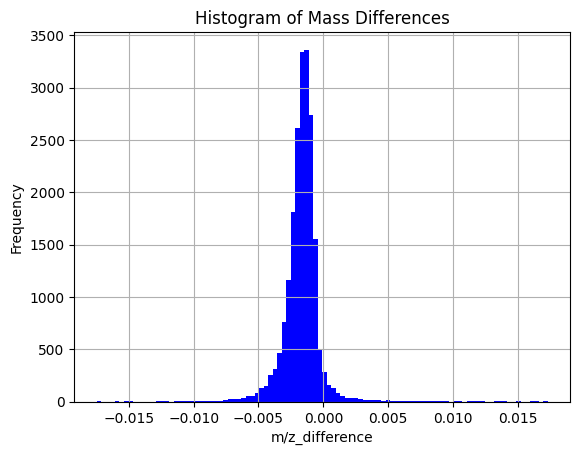

In [6]:
import matplotlib.pyplot as plt
plt.hist(df2['m/z_difference'], bins=100, color='blue')
plt.xlabel('m/z_difference')
plt.ylabel('Frequency')
plt.title('Histogram of Mass Differences')
plt.grid(True)
plt.show()

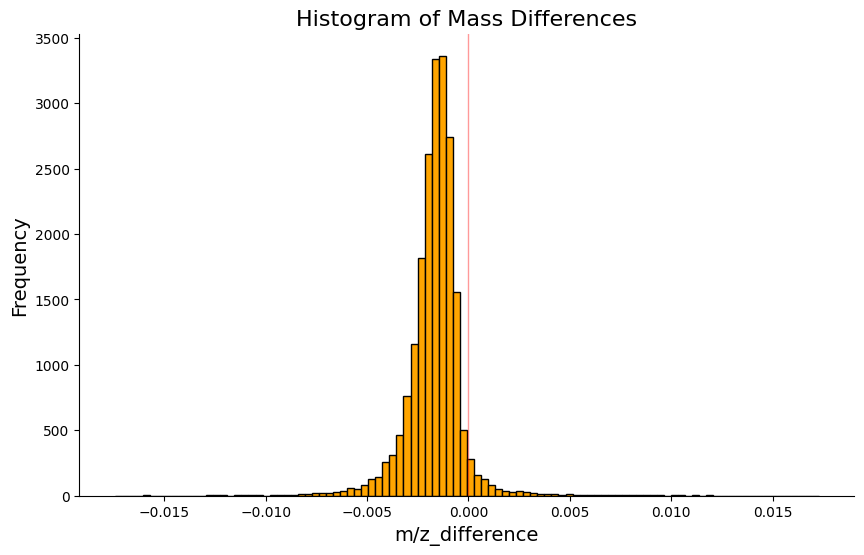

In [7]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(df2['m/z_difference'], bins=100, color='orange', edgecolor='black')

# Add a vertical line at x=0
plt.axvline(0, color='red', linewidth=1, alpha = 0.4)

# Set the labels and title
plt.xlabel('m/z_difference', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Mass Differences', fontsize=16)

# Remove the top and right spines from plot for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

Text(0.5, 1.0, 'Retention Time vs. mass difference')

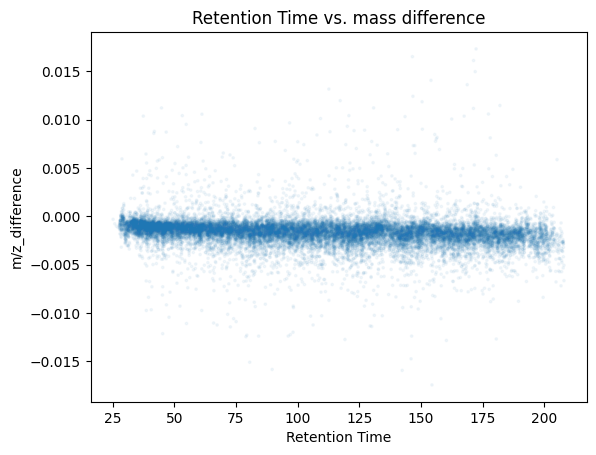

In [8]:
plt.scatter(df2['rt'], df2['m/z_difference'], marker='o', linestyle='', alpha=0.05, s=3)
plt.xlabel('Retention Time')
plt.ylabel('m/z_difference')
plt.title('Retention Time vs. mass difference')

Text(0.5, 1.0, 'Retention Time vs. mass difference')

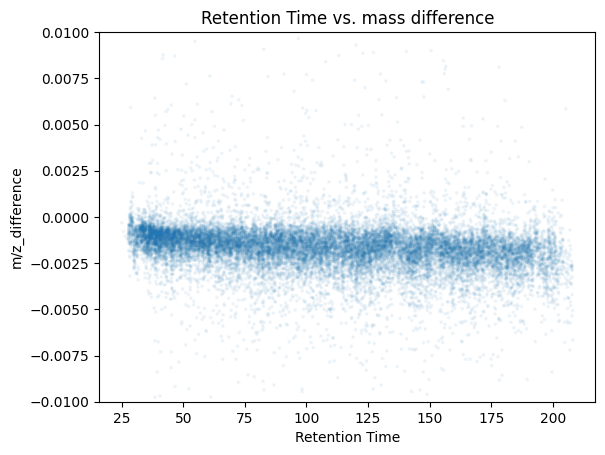

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df2['rt'], df2['m/z_difference'], marker='o', linestyle='', alpha=0.05, s=3)
plt.ylim(-0.01,0.01)
plt.xlabel('Retention Time')
plt.ylabel('m/z_difference')
plt.title('Retention Time vs. mass difference')

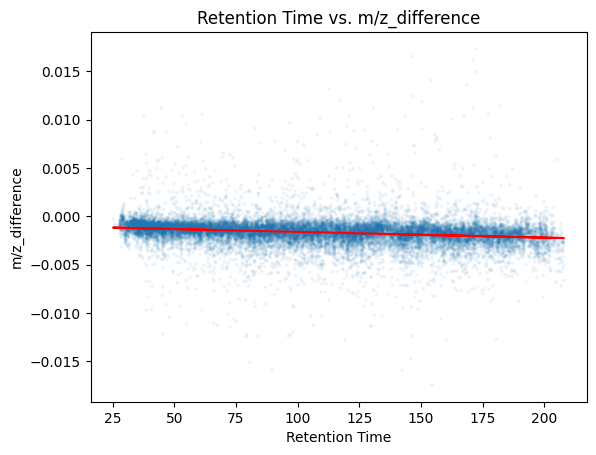

Slope: -5.925774672589858e-06
Intercept: -0.0010313075593546257


In [10]:
import numpy as np
# Scatter plot
plt.scatter(df2['rt'], df2['m/z_difference'], marker='o', linestyle='', alpha=0.05, s=3)
plt.xlabel('Retention Time')
plt.ylabel('m/z_difference')
plt.title('Retention Time vs. m/z_difference')

# Fit a line
x = df2['rt']
y = df2['m/z_difference']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), color='red')

plt.show()

# Get the coefficients
slope, intercept = coefficients
print("Slope:", slope)
print("Intercept:", intercept)

In [11]:
df2['adjusted_m/z_difference'] = df2['m/z_difference'] - (df2['rt'] * slope + intercept)
df2.head(5)

/tmp/ipykernel_3283210/1436933234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['adjusted_m/z_difference'] = df2['m/z_difference'] - (df2['rt'] * slope + intercept)


,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference,adjusted_m/z_difference
0,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19675,1,1,2204.8997,2204.8930,2,25,0,0.0,2.989617,2.100378,90.574402,63.795672,0.0,68.795135,0.329163,0.315955,0.013208,30,12,17,0.680000,54.120693,7,-14.363387,3.647504,-324.0,0.000732,0.001382,0.002178,254438610.0,19130256.0,1102.449850,1102.446500,-0.003350,-0.001911
1,SSGSPYGGGYGSGGGSGGYGSR,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=15193,1,1,1909.7876,1909.7827,3,22,0,0.0,2.556734,1.991155,82.026801,53.288273,0.0,58.068718,0.277841,0.311297,0.033456,28,11,16,0.727273,45.797142,10,-16.193417,3.522668,-324.0,0.000732,0.001382,0.002178,42127748.0,4489507.5,636.595867,636.594233,-0.001633,-0.000258
2,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19398,1,1,2204.8987,2204.8930,2,25,0,0.0,2.546712,2.024363,87.335601,59.066865,0.0,68.121860,0.325942,0.315955,0.009987,28,6,17,0.680000,51.516770,6,-12.166700,3.522601,-324.0,0.000732,0.001382,0.002178,685737100.0,48448784.0,1102.449350,1102.446500,-0.002850,-0.001415
3,SSGSPYGGGYGSGGGSGGYGSR,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=15312,1,1,1909.7885,1909.7827,2,22,0,0.0,3.004162,2.199959,91.323302,57.209023,0.0,58.315502,0.279022,0.311297,0.032275,30,7,11,0.500000,67.253110,5,-12.422244,3.508118,-324.0,0.000732,0.001382,0.002178,363671870.0,27385364.0,954.894250,954.891350,-0.002900,-0.001523
4,IGDLQAFQGHGAGNLAGLK,tr|A0A7P0T8F1|A0A7P0T8F1_HUMAN;tr|A0A7P0T8U7|A...,7,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=55692,1,1,1865.9807,1865.9751,2,19,0,0.0,3.009272,2.289789,77.181912,48.973836,0.0,150.484760,0.720023,0.789824,0.069801,26,9,14,0.736842,52.712300,47,-20.353523,3.402540,-324.0,0.000732,0.001382,0.002178,81874490.0,5527225.5,932.990350,932.987550,-0.002800,-0.000877


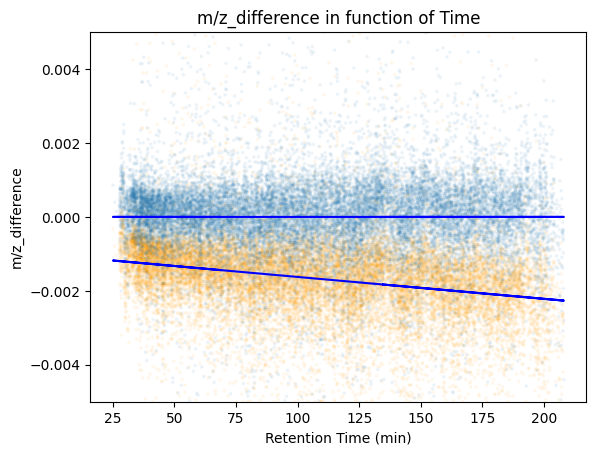

In [12]:
plt.scatter(df2['rt'], df2['m/z_difference'], marker='o', linestyle='', alpha=0.05, s=3, color = "orange")
plt.scatter(df2['rt'], df2['adjusted_m/z_difference'], marker='o', linestyle='', alpha=0.05, s=3)
plt.ylim(-0.005, 0.005)
plt.xlabel('Retention Time (min)')
plt.ylabel('m/z_difference')
plt.title('m/z_difference in function of Time')

# Fit a line
x = df2['rt']
y = df2['m/z_difference']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), color='blue')

x = df2['rt']
y = df2['adjusted_m/z_difference']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), color='blue')


plt.show()

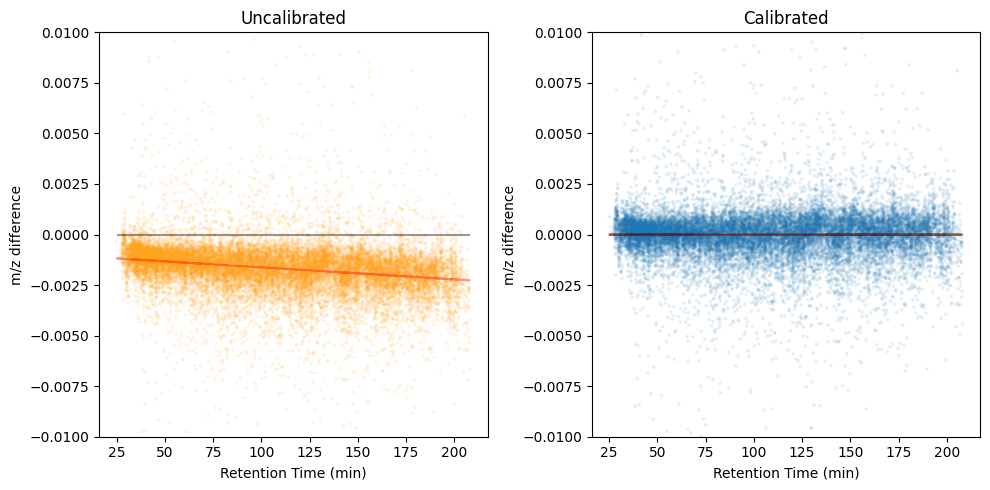

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First subplot
axs[0].scatter(df2['rt'], df2['m/z_difference'], marker='o', linestyle='', alpha=0.075, s=3, color = "#FFA519")
x = df2['rt']
y = df2['m/z_difference']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
axs[0].plot(x, polynomial(x), color='red', alpha=0.4)

# Get the x-range of the data in the second subplot
x_range = df2['rt']

# Add horizontal line at y=0 with the same x-range as the data in the second subplot
axs[0].hlines(0, min(x_range), max(x_range), colors='black', alpha=0.4)

axs[0].set_ylim(-0.01, 0.01)
axs[0].set_xlabel('Retention Time (min)')
axs[0].set_ylabel('m/z difference')
axs[0].set_title('Uncalibrated')

# Second subplot
axs[1].scatter(df2['rt'], df2['adjusted_m/z_difference'], marker='o', linestyle='', alpha=0.075, s=3)
x = df2['rt']
y = df2['adjusted_m/z_difference']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

axs[1].hlines(0, min(x_range), max(x_range), colors='red', alpha=0.4)

axs[1].plot(x, polynomial(x), color='black', alpha=0.4)
axs[1].set_ylim(-0.01, 0.01)
axs[1].set_xlabel('Retention Time (min)')
axs[1].set_ylabel('m/z difference')
axs[1].set_title('Calibrated')

plt.tight_layout()
plt.show()

In [14]:
df2['adjusted_exp_m/z'] = df2['exp_m/z'] + df2['adjusted_m/z_difference']
df2.head(5)

/tmp/ipykernel_3011239/3813262753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['adjusted_exp_m/z'] = df2['exp_m/z'] + df2['adjusted_m/z_difference']


,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference,adjusted_m/z_difference,adjusted_exp_m/z
0,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19675,1,1,2204.8997,2204.8930,2,25,0,0.0,2.989617,2.100378,90.574402,63.795672,0.0,68.795135,0.329163,0.315955,0.013208,30,12,17,0.680000,54.120693,7,-14.363387,3.647504,-324.0,0.000732,0.001382,0.002178,254438610.0,19130256.0,1102.449850,1102.446500,-0.003350,-0.001911,1102.447939
1,SSGSPYGGGYGSGGGSGGYGSR,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=15193,1,1,1909.7876,1909.7827,3,22,0,0.0,2.556734,1.991155,82.026801,53.288273,0.0,58.068718,0.277841,0.311297,0.033456,28,11,16,0.727273,45.797142,10,-16.193417,3.522668,-324.0,0.000732,0.001382,0.002178,42127748.0,4489507.5,636.595867,636.594233,-0.001633,-0.000258,636.595609
2,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19398,1,1,2204.8987,2204.8930,2,25,0,0.0,2.546712,2.024363,87.335601,59.066865,0.0,68.121860,0.325942,0.315955,0.009987,28,6,17,0.680000,51.516770,6,-12.166700,3.522601,-324.0,0.000732,0.001382,0.002178,685737100.0,48448784.0,1102.449350,1102.446500,-0.002850,-0.001415,1102.447935
3,SSGSPYGGGYGSGGGSGGYGSR,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=15312,1,1,1909.7885,1909.7827,2,22,0,0.0,3.004162,2.199959,91.323302,57.209023,0.0,58.315502,0.279022,0.311297,0.032275,30,7,11,0.500000,67.253110,5,-12.422244,3.508118,-324.0,0.000732,0.001382,0.002178,363671870.0,27385364.0,954.894250,954.891350,-0.002900,-0.001523,954.892727
4,IGDLQAFQGHGAGNLAGLK,tr|A0A7P0T8F1|A0A7P0T8F1_HUMAN;tr|A0A7P0T8U7|A...,7,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=55692,1,1,1865.9807,1865.9751,2,19,0,0.0,3.009272,2.289789,77.181912,48.973836,0.0,150.484760,0.720023,0.789824,0.069801,26,9,14,0.736842,52.712300,47,-20.353523,3.402540,-324.0,0.000732,0.001382,0.002178,81874490.0,5527225.5,932.990350,932.987550,-0.002800,-0.000877,932.989473


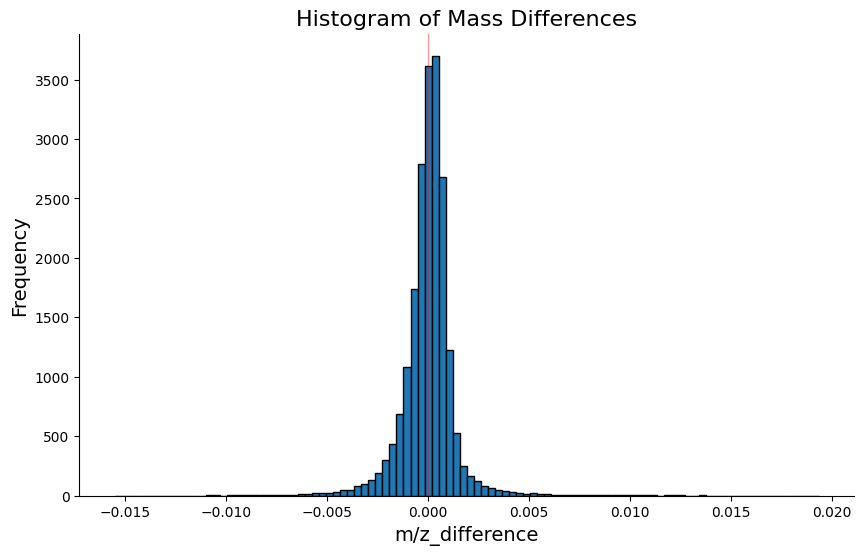

In [15]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(df2['adjusted_m/z_difference'], bins=100, edgecolor='black')

# Add a vertical line at x=0
plt.axvline(0, color='red', linewidth=1, alpha = 0.4)

# Set the labels and title
plt.xlabel('m/z_difference', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Mass Differences', fontsize=16)

# Remove the top and right spines from plot for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

In [16]:
from psims.transform.mzml import MzMLTransformer, cvstr

slope = -5.925774672589858e-06
intercept = -0.0010313075593546257

def calibrate_MS2(spectrum):
    if spectrum['ms level'] > 1:
        retention_time = spectrum['scanList']['scan'][0]['scan start time']
        mz_values = spectrum['m/z array']
            
        # Apply the calibration function to the m/z values
        calibrated_mz_values = mz_values - (retention_time * slope + intercept)
        
        # Replace the original m/z values with the calibrated ones
        spectrum['m/z array'] = calibrated_mz_values   
    return spectrum

with open("b1948_293T_proteinID_12B_QE3_122212.mzML", 'rb') as in_stream, open("Calibrated_TEST_V2_b1948_293T_proteinID_12B_QE3_122212.mzML", 'wb') as out_stream:
    MzMLTransformer(in_stream, out_stream, calibrate_MS2).write()

Handled 0 spectra


KeyboardInterrupt: 

In [19]:
from psims.transform.mzml import MzMLTransformer, cvstr

Slope = -5.925774672589858e-06
Intercept = -0.0010313075593546257

def calibrate_ms2(spectrum):
    retention_time = spectrum['scanList']['scan'][0]['scan start time']
    mz_values = spectrum['m/z array']
        
    # Apply the calibration function to the m/z values
    calibrated_mz_values = mz_values - (retention_time * slope + intercept)
    
    # Replace the original m/z values with the calibrated ones
    spectrum['m/z array'] = calibrated_mz_values   
    return spectrum

with open("b1948_293T_proteinID_12B_QE3_122212.mzML", 'rb') as in_stream, open("MS1andMS2_CalibratedV2_TEST_b1948_293T_proteinID_12B_QE3_122212.mzML", 'wb') as out_stream:
    MzMLTransformer(in_stream, out_stream, calibrate_ms2).write()

Handled 0 spectra
Handled 1000 spectra
Handled 2000 spectra
Handled 3000 spectra
Handled 4000 spectra
Handled 5000 spectra
Handled 6000 spectra
Handled 7000 spectra
Handled 8000 spectra
Handled 9000 spectra
Handled 10000 spectra
Handled 11000 spectra
Handled 12000 spectra
Handled 13000 spectra
Handled 14000 spectra
Handled 15000 spectra
Handled 16000 spectra
Handled 17000 spectra
Handled 18000 spectra
Handled 19000 spectra
Handled 20000 spectra
Handled 21000 spectra
Handled 22000 spectra
Handled 23000 spectra
Handled 24000 spectra
Handled 25000 spectra
Handled 26000 spectra
Handled 27000 spectra
Handled 28000 spectra
Handled 29000 spectra
Handled 30000 spectra
Handled 31000 spectra
Handled 32000 spectra
Handled 33000 spectra
Handled 34000 spectra
Handled 35000 spectra
Handled 36000 spectra
Handled 37000 spectra
Handled 38000 spectra
Handled 39000 spectra
Handled 40000 spectra
Handled 41000 spectra
Handled 42000 spectra
Handled 43000 spectra
Handled 44000 spectra
Handled 45000 spectra
H

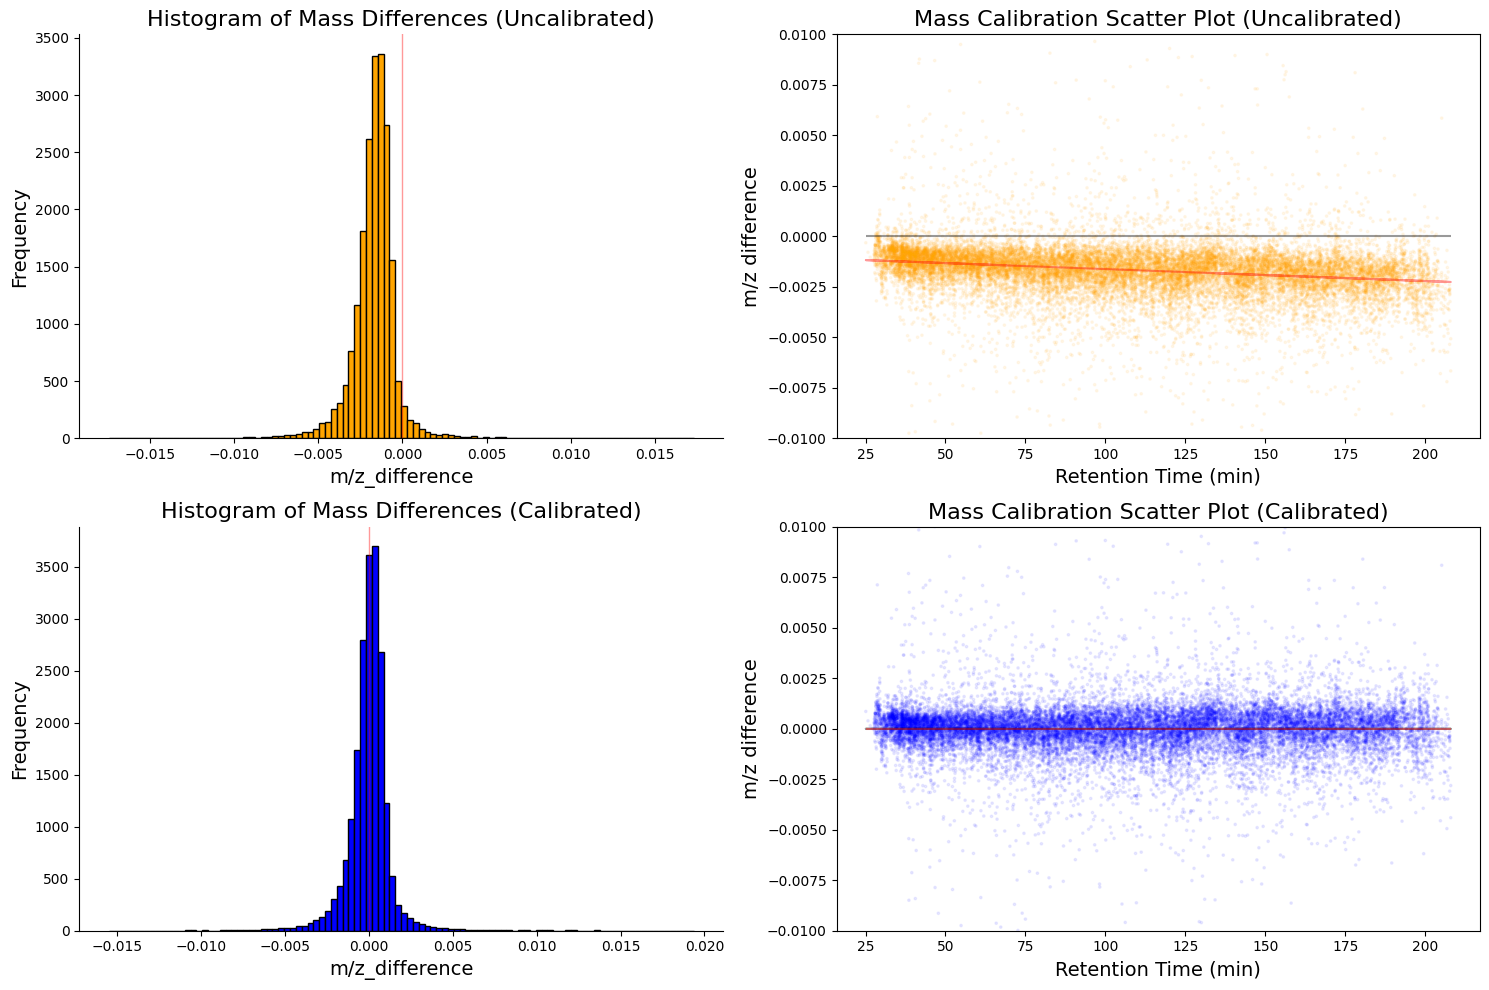

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# Top-left subplot (Orange Histogram)
axs[0, 0].hist(df2['m/z_difference'], bins=100, color='orange', edgecolor='black')
axs[0, 0].axvline(0, color='red', linewidth=1, alpha=0.4)
axs[0, 0].set_xlabel('m/z_difference', fontsize=14)
axs[0, 0].set_ylabel('Frequency', fontsize=14)
axs[0, 0].set_title('Histogram of Mass Differences (Uncalibrated)', fontsize=16)
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)

# Top-right subplot (Orange Scatter Plot)
axs[0, 1].scatter(df2['rt'], df2['m/z_difference'], marker='o', linestyle='', alpha=0.075, s=3, color='orange')
x = df2['rt']
y = df2['m/z_difference']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
axs[0, 1].plot(x, polynomial(x), color='red', alpha=0.4)
axs[0, 1].hlines(0, min(x), max(x), colors='black', alpha=0.4)
axs[0, 1].set_ylim(-0.01, 0.01)
axs[0, 1].set_xlabel('Retention Time (min)', fontsize=14)
axs[0, 1].set_ylabel('m/z difference', fontsize=14)
axs[0, 1].set_title('Mass Calibration Scatter Plot (Uncalibrated)', fontsize=16)

# Bottom-left subplot (Blue Histogram)
axs[1, 0].hist(df2['adjusted_m/z_difference'], bins=100, color='blue', edgecolor='black')
axs[1, 0].axvline(0, color='red', linewidth=1, alpha=0.4)
axs[1, 0].set_xlabel('m/z_difference', fontsize=14)
axs[1, 0].set_ylabel('Frequency', fontsize=14)
axs[1, 0].set_title('Histogram of Mass Differences (Calibrated)', fontsize=16)
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)

# Bottom-right subplot (Blue Scatter Plot)
axs[1, 1].scatter(df2['rt'], df2['adjusted_m/z_difference'], marker='o', linestyle='', alpha=0.075, s=3, color='blue')
x = df2['rt']
y = df2['adjusted_m/z_difference']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
axs[1, 1].plot(x, polynomial(x), color='black', alpha=0.4)
axs[1, 1].hlines(0, min(x), max(x), colors='red', alpha=0.4)
axs[1, 1].set_ylim(-0.01, 0.01)
axs[1, 1].set_xlabel('Retention Time (min)', fontsize=14)
axs[1, 1].set_ylabel('m/z difference', fontsize=14)
axs[1, 1].set_title('Mass Calibration Scatter Plot (Calibrated)', fontsize=16)

plt.tight_layout()
plt.show()